#### Importing Relevant Libraries and Data

In [79]:
data = "files/Market_details.csv"

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [83]:
data = pd.read_csv(data)
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


#### Plotting the data

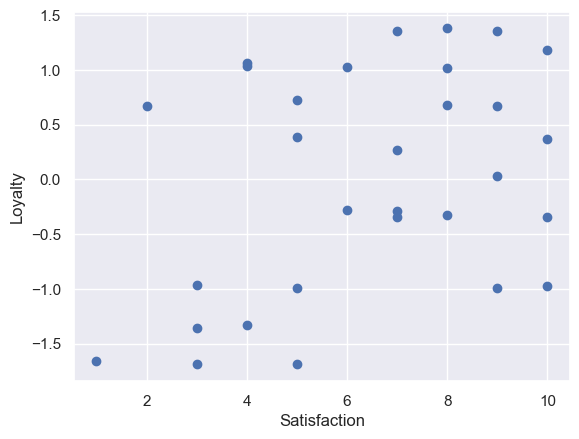

In [86]:
plt.scatter(data["Satisfaction"],data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [88]:
x = data.copy()

In [90]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [77]:
clusters = x.copy()
clusters["Cluster_pred"] = kmeans.fit_predict(x)

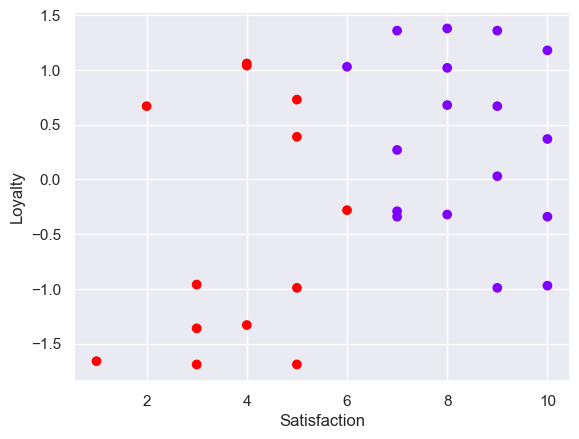

In [96]:
plt.scatter(data["Satisfaction"],data["Loyalty"],c=clusters["Cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

#### Standardizing the variables to give equal weights to features

In [103]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

#### Finding K using the Elbow Methods

In [109]:
# 10 is arbitrarily chosen
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[229.16347000000002,
 74.51511402714934,
 49.467933333333335,
 34.42895833333333,
 26.861604166666666,
 21.459241904761903,
 17.802588333333336,
 14.797326666666665,
 11.195875000000001]

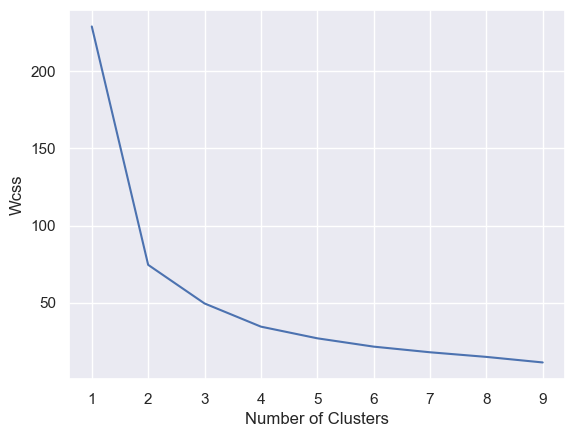

In [111]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("Wcss")
plt.show()

#### Exploring different possibilities with standardized variable


In [137]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new["Cluster_Pred"] = kmeans_new.fit_predict(x_scaled)
cluster_new.head()

,Satisfaction,Loyalty,Cluster_Pred
0,4,-1.33,1
1,6,-0.28,3
2,5,-0.99,1
3,7,-0.29,3
4,4,1.06,2


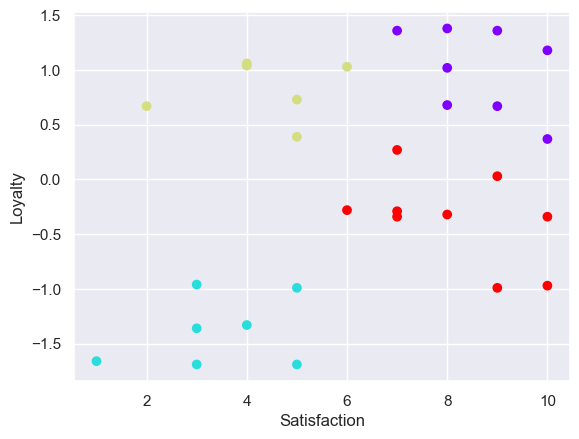

In [139]:
plt.scatter(cluster_new["Satisfaction"],data["Loyalty"],c=cluster_new["Cluster_Pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [ ]:
#### 